# Data Science Project on CROP YIELD PREDICTION in State of Gujarat

Dataset link :

https://www.kaggle.com/kpkhant007/gujarat-crop-related-weather-data-19972012/discussion

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (10,8)

<h3>Load Data<h3>

In [2]:
dl = pd.read_csv("C:/Users/dobar/Desktop/Project/csv/Final.csv")

In [3]:
dl.head()

,State,City,Year,Season,Crop,Area,avgTemp,Cloud Cover,maxTemp,Precipitation,vapPressure,Rainfall,Wet Day Freq,minTemp,Production
0,Gujarat,Ahmedabad,1997,Kharif,Arhar/Tur,2900,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,2200.0
1,Gujarat,Ahmedabad,1997,Kharif,Bajra,41700,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,43700.0
2,Gujarat,Ahmedabad,1997,Kharif,Dry chillies,700,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,700.0
3,Gujarat,Ahmedabad,1997,Kharif,Groundnut,500,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,600.0
4,Gujarat,Ahmedabad,1997,Kharif,Jowar,42500,31.2394,52.4228,37.931,176.327,35.2654,540.9,12.6895,24.037,33500.0


In [4]:
dl.isnull().sum()

State              0
City               0
Year               0
Season             0
Crop               0
Area               0
avgTemp            2
Cloud Cover        7
maxTemp            7
Precipitation      7
vapPressure        7
Rainfall           0
Wet Day Freq       7
minTemp          228
Production        69
dtype: int64

In [5]:
dl = dl.dropna()
dl.isnull().sum()

State            0
City             0
Year             0
Season           0
Crop             0
Area             0
avgTemp          0
Cloud Cover      0
maxTemp          0
Precipitation    0
vapPressure      0
Rainfall         0
Wet Day Freq     0
minTemp          0
Production       0
dtype: int64

In [6]:
#converting production to numeric type
dl['Production'] = pd.to_numeric(dl['Production'],errors='coerce')

In [7]:
#grouping area and production for each year by mean
data=dl.groupby(['Year'])[['Area','Production']].mean()
data=data.reset_index(level=0, inplace=False)
data

,Year,Area,Production
0,1997,22524.349882,64158.219858
1,1998,27772.700219,76906.805252
2,1999,19366.350711,57756.161137
3,2000,19475.603865,49304.589372
4,2001,20296.252927,60744.028103
5,2002,19694.685990,54999.154589
6,2003,17299.797980,65805.454545
7,2004,16768.369352,61796.070727
8,2005,16771.374046,76803.244275
9,2006,17639.924670,68420.527307


In [8]:
data['CPI']=data['Production']/data['Area']
data.head()

,Year,Area,Production,CPI
0,1997,22524.349882,64158.219858,2.848394
1,1998,27772.700219,76906.805252,2.769151
2,1999,19366.350711,57756.161137,2.982294
3,2000,19475.603865,49304.589372,2.531608
4,2001,20296.252927,60744.028103,2.992869


In [9]:
data.describe()

,Year,Area,Production,CPI
count,16.000000,16.000000,16.000000,16.000000
mean,2004.500000,18466.021721,62542.521099,3.436569
std,4.760952,3178.243542,10776.663773,0.676974
min,1997.000000,14626.975945,34093.127148,2.330839
25%,2000.750000,16671.960467,58294.469116,2.834443
50%,2004.500000,17469.861325,64390.648391,3.689665
75%,2008.250000,19530.374396,66533.504129,3.906887
max,2012.000000,27772.700219,76906.805252,4.579425


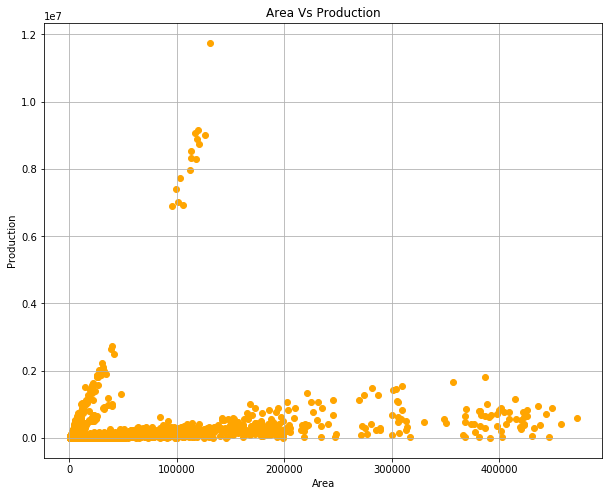

In [10]:
plt.scatter(dl['Area'],dl['Production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

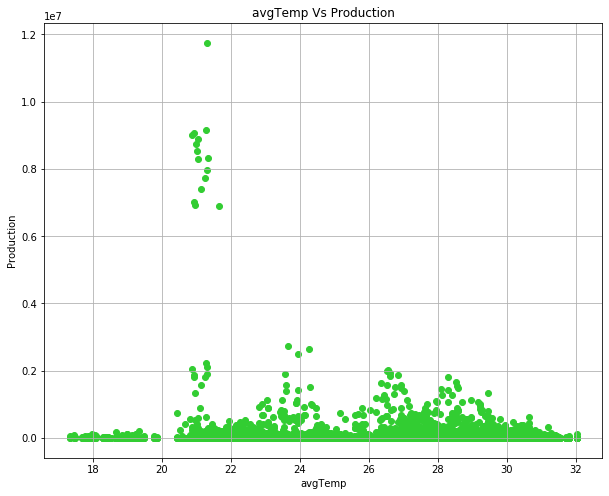

In [11]:
plt.scatter(dl['avgTemp'],dl['Production'],color='limegreen')
plt.title("avgTemp Vs Production")
plt.xlabel("avgTemp")
plt.ylabel("Production")
plt.grid()
plt.show()

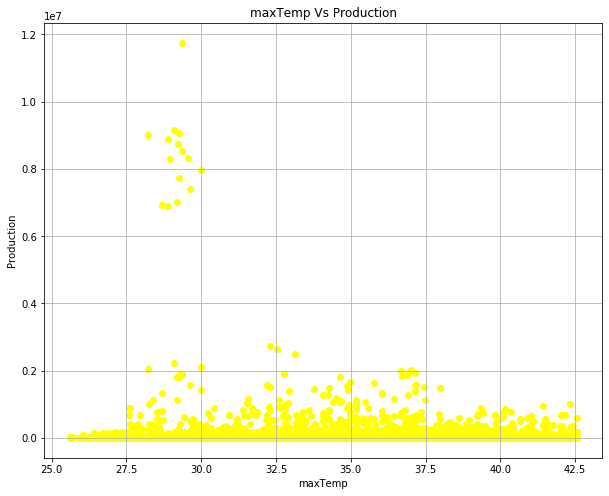

In [12]:
plt.scatter(dl['maxTemp'],dl['Production'],color='yellow')
plt.title("maxTemp Vs Production")
plt.xlabel("maxTemp")
plt.ylabel("Production")
plt.grid()
plt.show()

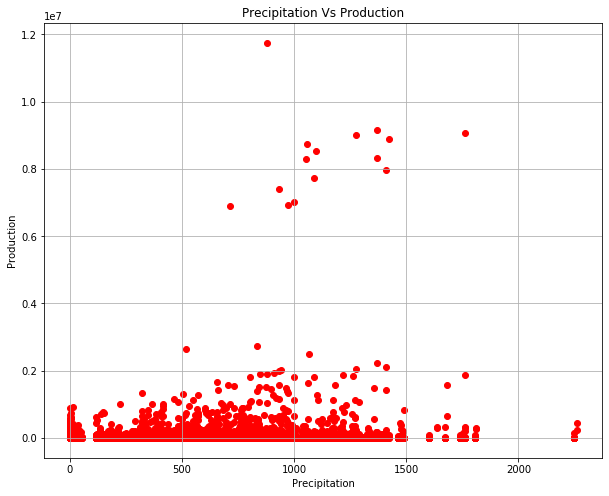

In [13]:
plt.scatter(dl['Precipitation'],dl['Production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

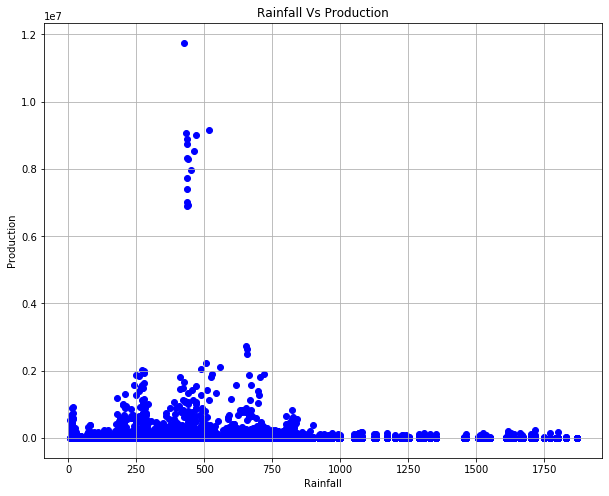

In [14]:
plt.scatter(dl['Rainfall'],dl['Production'],color='blue')
plt.title("Rainfall Vs Production")
plt.xlabel("Rainfall")
plt.ylabel("Production")
plt.grid()
plt.show()

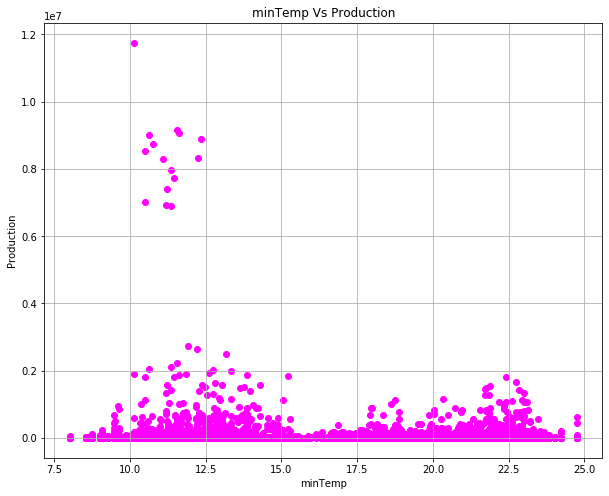

In [15]:
plt.scatter(dl['minTemp'],dl['Production'],color='magenta')
plt.title("minTemp Vs Production")
plt.xlabel("minTemp")
plt.ylabel("Production")
plt.grid()
plt.show()

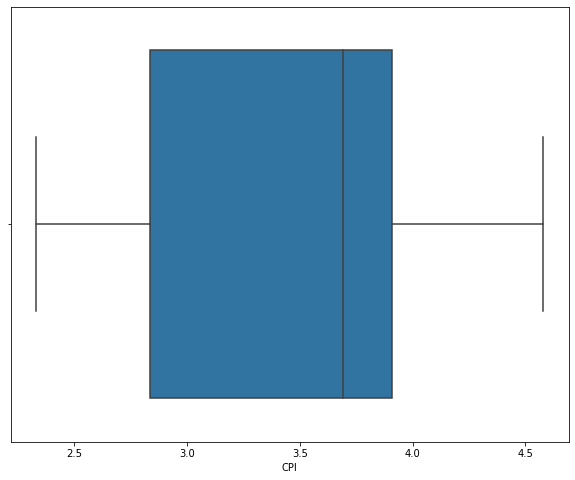

In [16]:
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [17]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI >2.7]
data=data[data.CPI <4.0]
data.set_index('Year')
data

,Year,Area,Production,CPI
0,1997,22524.349882,64158.219858,2.848394
1,1998,27772.700219,76906.805252,2.769151
2,1999,19366.350711,57756.161137,2.982294
4,2001,20296.252927,60744.028103,2.992869
5,2002,19694.685990,54999.154589,2.792589
6,2003,17299.797980,65805.454545,3.803828
7,2004,16768.369352,61796.070727,3.685276
9,2006,17639.924670,68420.527307,3.878731
12,2009,15829.197080,58473.905109,3.694054
13,2010,16190.769231,64623.076923,3.991353


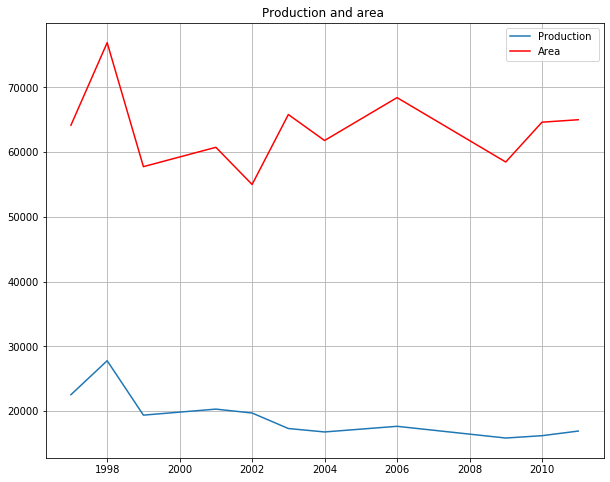

In [18]:
#comparison of production and area for each year
x_axis=data.Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.grid()
plt.show()

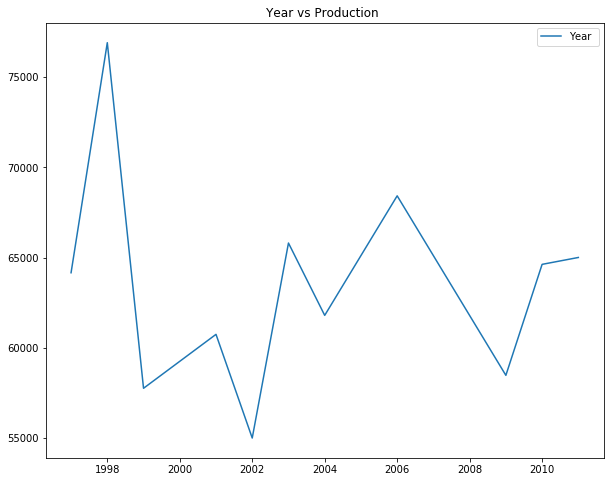

In [19]:
x_axis=data.Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [21]:
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=12, n_jobs=1, oob_score=False,
                      random_state=0, verbose=13, warm_start=False)

In [22]:
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([2.83974157, 2.80012023, 2.87572283, 2.94191774, 2.91023859,
       3.5578288 , 3.68628264, 3.86624737, 3.81792849, 3.91702827,
       3.89338015])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

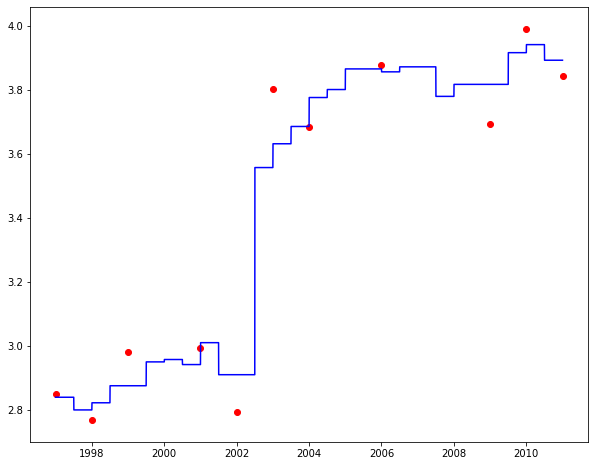

In [23]:
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a

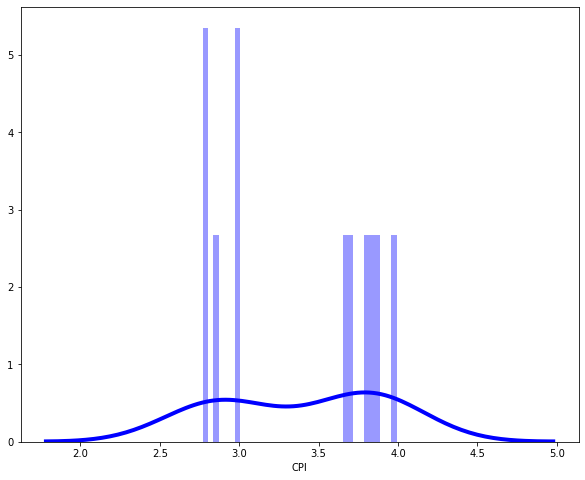

In [24]:
sns.distplot(data['CPI'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             kde_kws={'linewidth': 4})

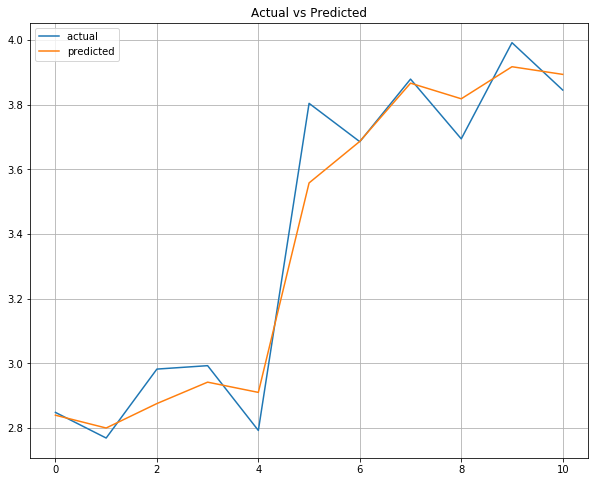

In [25]:
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.grid()
b=plt.show()
